In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib
from scipy.stats import norm
warnings.simplefilter('ignore')

In [2]:
def dataset(data):
    print('Brief Data'.center(60,'-'))
    print('Dtype Info'.center(70,'~'))
    print(data.info())
    print('Brief Description data'.center(70,'~'))
    print(data.describe())
    print('Null data:')
    print(data.isnull().sum())
    print('Duplicate')
    print(data.duplicated().sum())
    print('Uniqueness:')
    print(data.nunique().sum())

In [3]:
df_train = pd.read_csv('train.csv')
dataset(df_train)

-------------------------Brief Data-------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Dtype Info~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType

In [4]:
df_test = pd.read_csv('test.csv')
dataset(df_test)

-------------------------Brief Data-------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Dtype Info~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType

<Axes: >

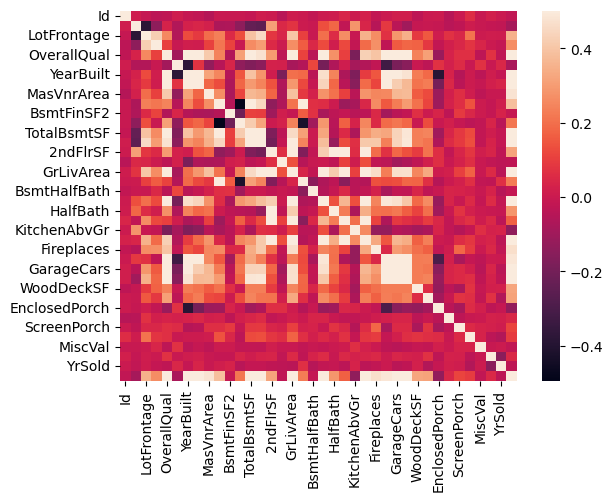

In [5]:
#Correlation of SalePrice and other features by using heatmap
sns.heatmap(df_train.corr(), vmax = .5)

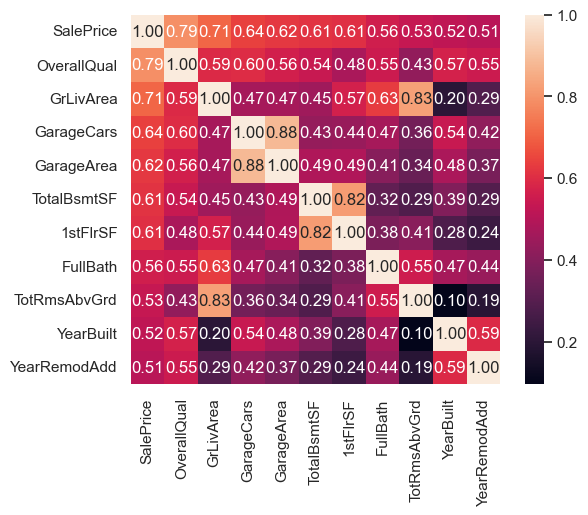

In [6]:
#Too many features, so we show the highest score of Pearson Corr
k = 11
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale= 1.00)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', xticklabels=cols.values, yticklabels=cols.values)

In [7]:
cols.values

array(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
       'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'], dtype=object)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

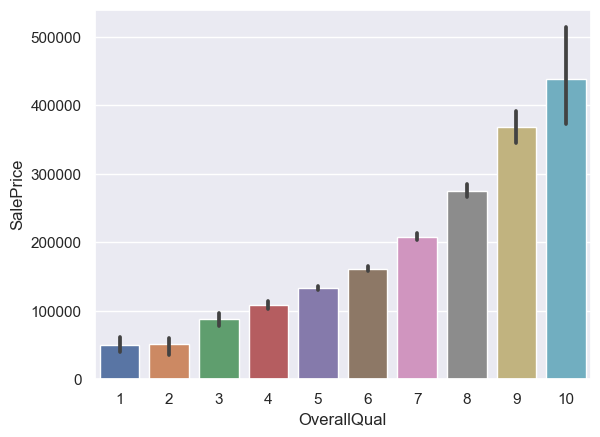

In [8]:
#OverallQual is one of the highest corr score 
sns.barplot(data = df_train, x = 'OverallQual', y = 'SalePrice')

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

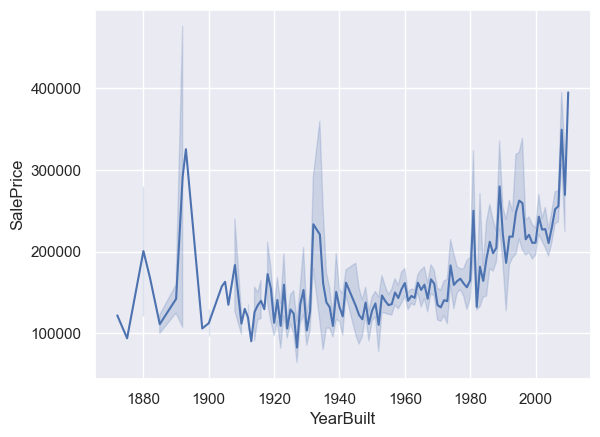

In [9]:
sns.lineplot(data = df_train, x = df_train['YearBuilt'], y = df_train['SalePrice'])

# Who is 'SalePrice'?

The answer to this question lies in testing for the assumptions underlying the statistical 
bases for multivariate analysis. We already did some data cleaning and discovered
a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' 
complies with the statistical assumptions that enables us to apply multivariate techniques.

According to Hair et al (2013), four assumptions should be tested

1. Normality (data should look like normal distribution due to several statistic tests rely on this
e.g. t-statistics)
2. Homoscedasticy (refers to 'assumption dependent variable(s) exhibit equal levels of variance 
accross the range of predictor variable(s)')
3. Linearity (refers to relationship between dependent and independent variable(s))
4. Absence of correlation errors (the error appeared when correlated to another)
"""

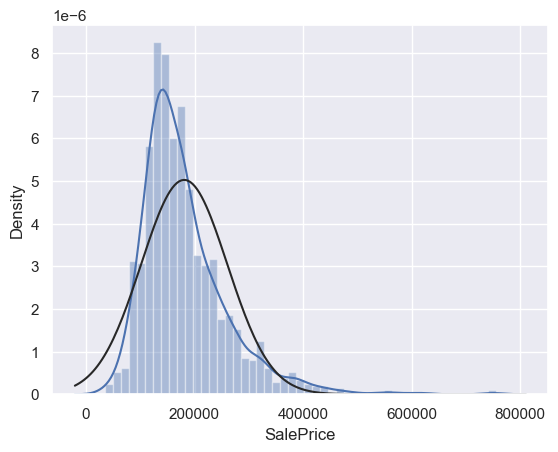

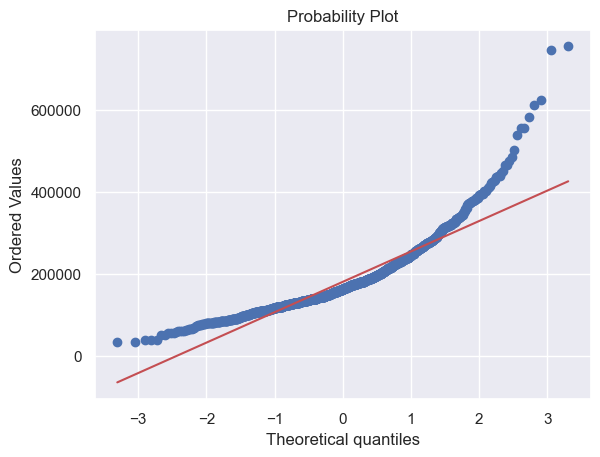

In [10]:
#identify SalePrice distribution
from scipy import stats
from scipy.stats import norm
sns.distplot(df_train['SalePrice'], kde = True, fit =  norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

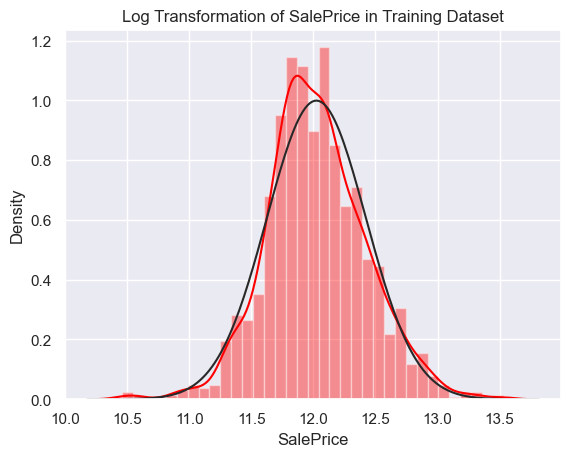

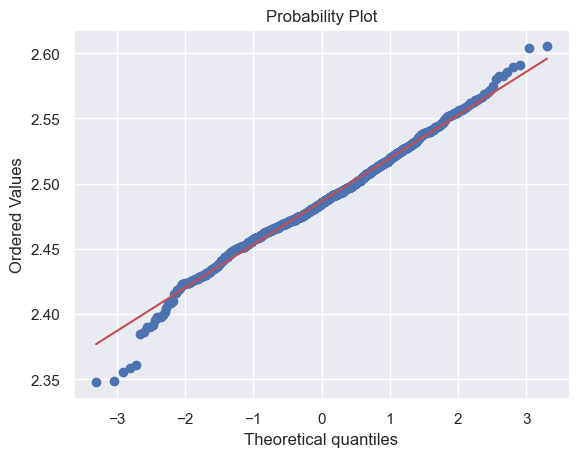

In [11]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], fit = norm, color = 'red')
plt.title('Log Transformation of SalePrice in Training Dataset')
fig = plt.figure()
res = stats.probplot(np.log(df_train['SalePrice']), plot = plt)

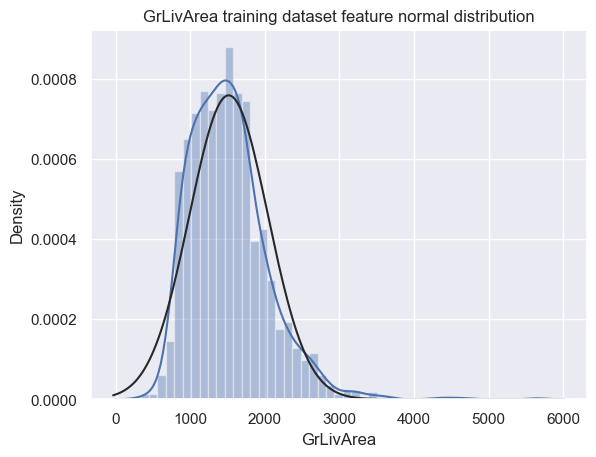

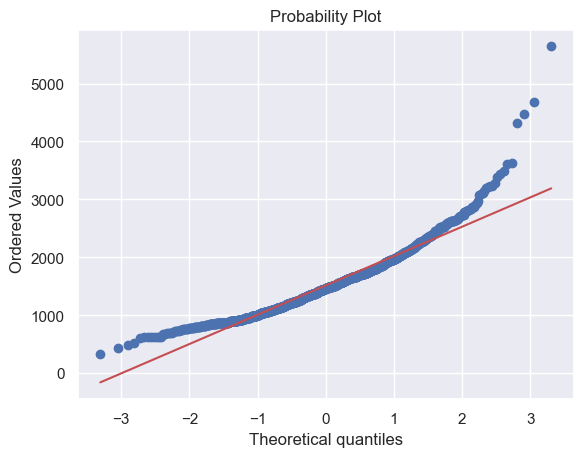

In [12]:
# Lets check GrLivArea train data
sns.distplot(df_train['GrLivArea'], fit = norm)
plt.title('GrLivArea training dataset feature normal distribution')
fig = plt.figure()
res =  stats.probplot(df_train['GrLivArea'], plot = plt)

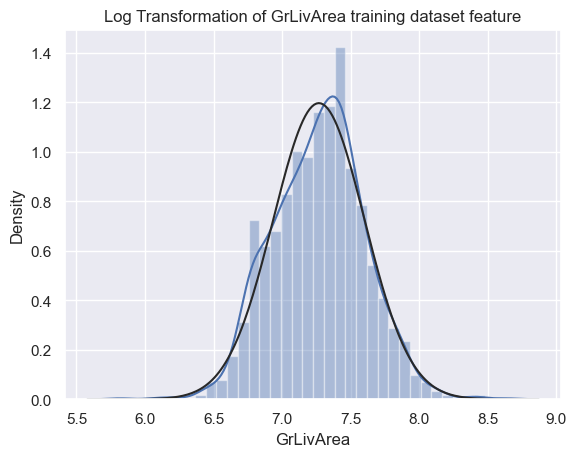

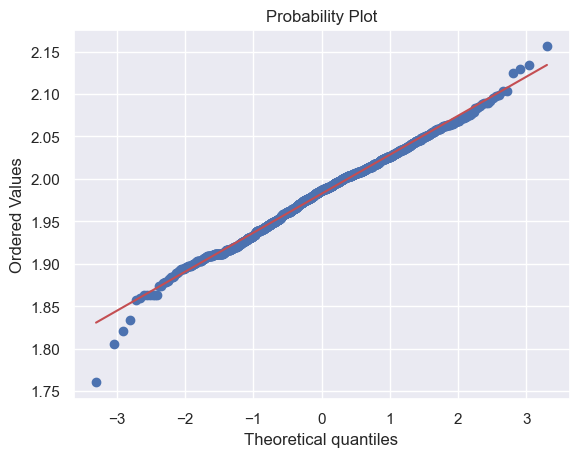

In [13]:
# after log transformation of GrLivArea train dataset
df_train['GrLivArea'] = np.log1p(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'], fit = norm)
plt.title('Log Transformation of GrLivArea training dataset feature')
fig = plt.figure()
res = stats.probplot(np.log(df_train['GrLivArea']),  plot = plt) 

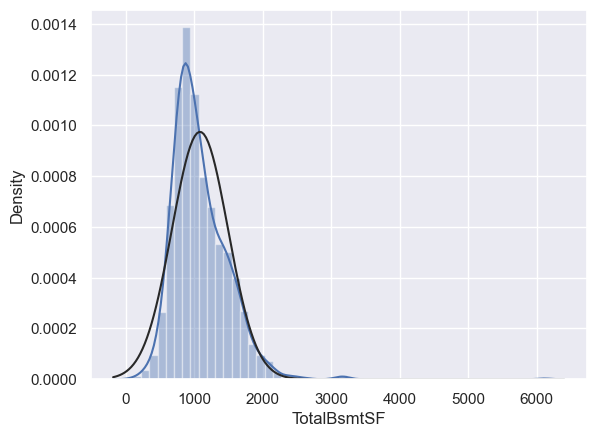

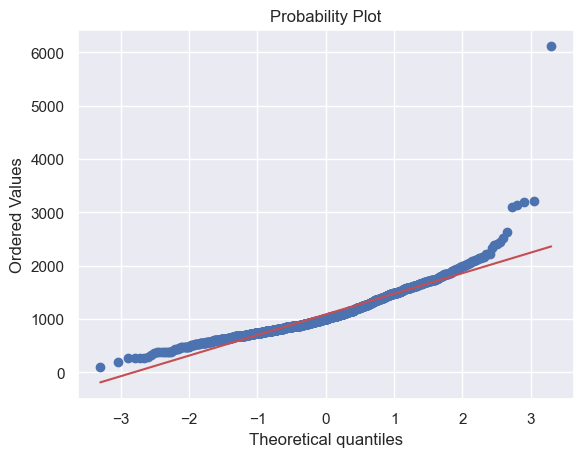

In [14]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot = plt)

In [15]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']),index = df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']> 0, 'HasBsmt'] = 1

In [16]:
df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log1p(df_train['TotalBsmtSF'])

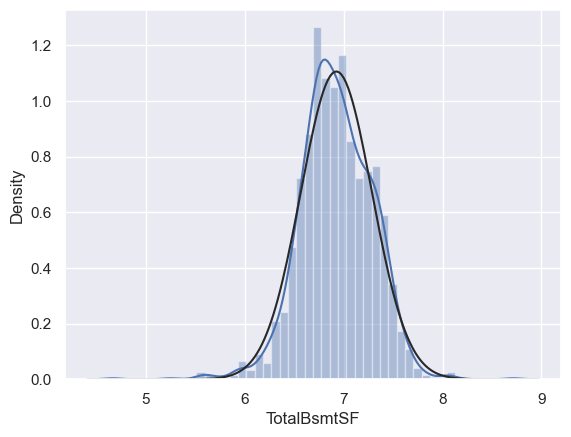

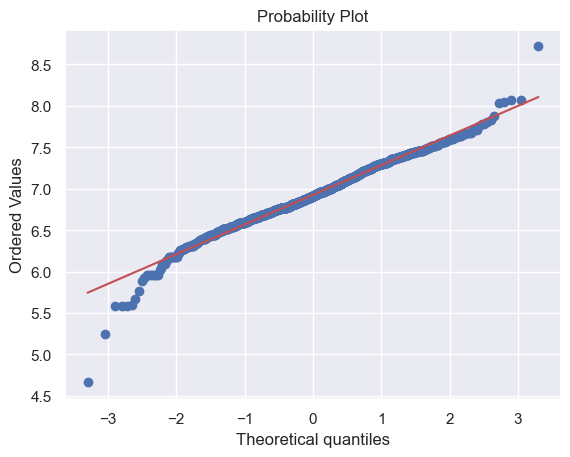

In [17]:
#Let's see normal plot after transformation
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot = plt)

In [18]:
# Missing data
total = df_train.isnull().sum().sort_values(ascending= False)
percent = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageQual,81,5.547945


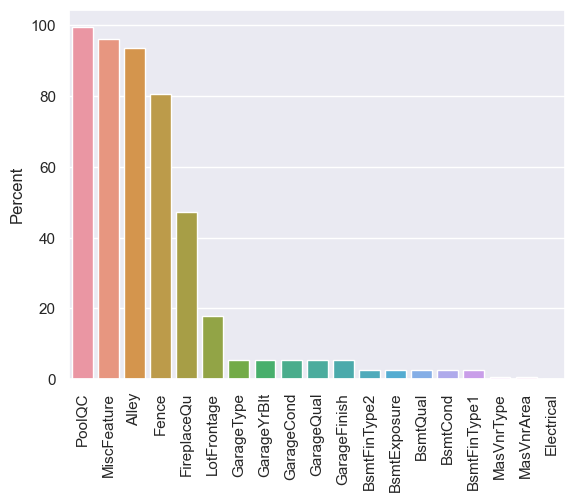

In [19]:
true_miss_data = missing_data.drop(missing_data[missing_data['Total']==0].index)
sns.barplot(data = true_miss_data, x = true_miss_data.index, y = true_miss_data.Percent)
plt.xticks(rotation = 90)
plt.show()

- **PoolQC**: This feature has 99 percent missing value. This indicate that majority of the dream house does not have pool

In [20]:
df_train.drop('PoolQC', axis = 1, inplace = True)

- **MiscFeature**: the second feature which have the most missing value

In [21]:
df_train.drop('MiscFeature', axis = 1, inplace = True)

- **Alley**: have third numerous null values

In [22]:
df_train.drop('Alley',  axis = 1, inplace = True)

- **Fence**

In [23]:
df_train.drop('Fence', axis = 1, inplace = True)

- **GarageX**

In [24]:
col_garagex_object = ['GarageFinish', 'GarageQual', 'GarageCond', 'GarageType']
col_garagex_num = ["GarageYrBlt", "GarageArea",  "GarageCars"]
for col in col_garagex_object:
    df_train[col] = df_train[col].fillna('None')

In [25]:
for col in col_garagex_num:
    df_train[col] = df_train[col].fillna(df_train[col].mean())

- **BsmtX**

In [26]:
col_bsmtx= ['BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1',
           'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

In [27]:
for col in col_bsmtx:
    if df_train[col].dtypes != 'object':
        df_train[col] = df_train[col].fillna(df_train[col].mean())
    else:
        df_train[col] = df_train[col].fillna('None')

In [28]:
df_train[col_bsmtx].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtCond      1460 non-null   object 
 1   BsmtQual      1460 non-null   object 
 2   BsmtExposure  1460 non-null   object 
 3   BsmtFinType1  1460 non-null   object 
 4   BsmtFinType2  1460 non-null   object 
 5   BsmtFinSF1    1460 non-null   int64  
 6   BsmtFinSF2    1460 non-null   int64  
 7   BsmtUnfSF     1460 non-null   int64  
 8   TotalBsmtSF   1460 non-null   float64
 9   BsmtFullBath  1460 non-null   int64  
 10  BsmtHalfBath  1460 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 125.6+ KB


In [29]:
#Let's check null data 
total_null_train = df_train.isnull().sum().sort_values(ascending = False)
new_percent_null_train = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending = False)
df_train_new = pd.concat([total_null_train,new_percent_null_train], keys = ['Total','Percent'], axis = 1)
df_train_new.head(20)

,Total,Percent
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
KitchenAbvGr,0,0.000000
GarageType,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000


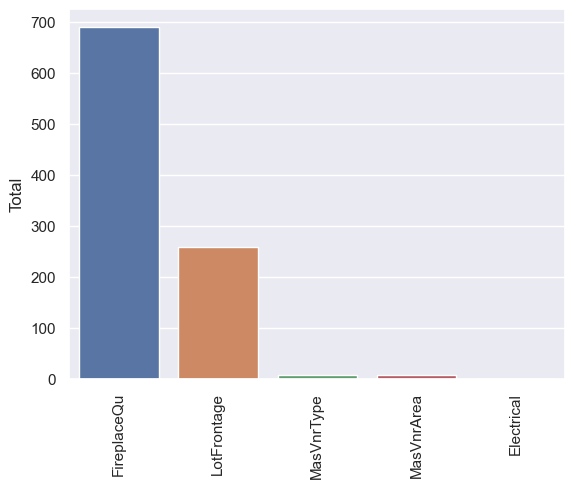

In [30]:
new_null_df_train = df_train_new.drop(df_train_new[df_train_new['Total']==0].index)
sns.barplot(new_null_df_train, x = new_null_df_train.index, y = new_null_df_train['Total'])
plt.xticks(rotation = 90)
plt.show()

- **FireplaceQu**: Fireplace Quality

In [31]:
#This column has more than 50% missing index
df_train.drop('FireplaceQu', axis = 1, inplace = True)

- **LotFrontage**

In [32]:
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [33]:
# Null data after handle missing value
total_null_set = df_train.isnull().sum().sort_values(ascending = False)
new_ = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending = False)
dft_new = pd.concat([total_null_set,new_], keys = ['Total','Percent'], axis = 1)
dft_new.head(20)

,Total,Percent
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
BedroomAbvGr,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000
KitchenQual,0,0.000000
KitchenAbvGr,0,0.000000
HalfBath,0,0.000000


In [34]:
# that's good, lets see skewness of the data
from scipy.stats import skew, kurtosis
numeric_feats = df_train.dtypes[df_train.dtypes != 'object'].index
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewed_feats = skewed_feats[skewed_feats>0.75]
print('Skew in numerical features')
skewness_train = pd.DataFrame({'Skew':skewed_feats})
skewness_train.head(10)

Skew in numerical features


,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


In [35]:
#We have to transform these columns using boxcox1p
from scipy.special import boxcox1p

skewness_abs_train = skewness_train[abs(skewness_train)>1]
print('{} skewed features changed to boxcox 1p transformation'.format(skewness_abs_train.shape[0]))
skewness_features_ = skewness_abs_train.index
lambdax = 0.0015
for skew_feat in skewness_features_:
    df_train[skew_feat] = boxcox1p(df_train[skew_feat], lambdax)

19 skewed features changed to boxcox 1p transformation


In [36]:
#Check the post-transformation data
numeric_feats = df_train.dtypes[df_train.dtypes != 'object'].index
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewed_feats = skewed_feats[skewed_feats>0.75]
print('Skew in numerical features')
skewness_train = pd.DataFrame({'Skew':skewed_feats})
skewness_train.head(10)

Skew in numerical features


,Skew
PoolArea,14.348443
3SsnPorch,7.727792
LowQualFinSF,7.453762
MiscVal,5.167238
BsmtHalfBath,3.929156
KitchenAbvGr,3.866850
ScreenPorch,3.147446
BsmtFinSF2,2.521834
EnclosedPorch,2.110504


In [37]:
#We have several data 
df_train[df_train[df_train.columns]==0][df_train.columns].count().sort_values(ascending =False)

PoolArea        1453
3SsnPorch       1436
LowQualFinSF    1434
MiscVal         1408
BsmtHalfBath    1378
                ... 
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
Heating            0
Length: 77, dtype: int64

In [38]:
df_train.drop(['PoolArea','3SsnPorch','LowQualFinSF','MiscVal','BsmtHalfBath'], axis = 1, inplace = True)

In [39]:
df_train.drop(['ScreenPorch','BsmtFinSF2','EnclosedPorch','HalfBath','MasVnrArea'], axis = 1, inplace = True)

In [40]:
df_train.drop(['BsmtFullBath','2ndFlrSF', 'WoodDeckSF'], axis =  1, inplace = True)

In [41]:
df_train[df_train[df_train.columns]==0][df_train.columns].count().sort_values(ascending =False)

Fireplaces      690
OpenPorchSF     656
BsmtFinSF1      467
BsmtUnfSF       118
GarageArea       81
               ... 
BsmtExposure      0
BsmtFinType1      0
MSSubClass        0
BsmtFinType2      0
Id                0
Length: 64, dtype: int64

In [42]:
numeric_feats = df_train.dtypes[df_train.dtypes != 'object'].index
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewed_feats = skewed_feats[skewed_feats>0.75]
print('Skew in numerical features')
skewness_train = pd.DataFrame({'Skew':skewed_feats})
skewness_train.head(10)

Skew in numerical features


,Skew
KitchenAbvGr,3.86685


In [43]:
(df_train[df_train[df_train.columns]==0][df_train.columns].count()*100/df_train.shape[0]).sort_values(ascending = False)

Fireplaces      47.260274
OpenPorchSF     44.931507
BsmtFinSF1      31.986301
BsmtUnfSF        8.082192
GarageArea       5.547945
                  ...    
BsmtExposure     0.000000
BsmtFinType1     0.000000
MSSubClass       0.000000
BsmtFinType2     0.000000
Id               0.000000
Length: 64, dtype: float64

In [44]:
# encode string data
df_train_dummy = pd.get_dummies(df_train)

In [45]:
df_train_dummy.shape

(1460, 269)

In [46]:
df_train_dummy = df_train_dummy.fillna(df_train_dummy.mean())

In [47]:
X_train = df_train_dummy[:df_train_dummy.shape[0]]
y_train = df_train_dummy['SalePrice']
X_train.drop('Id', axis = 1, inplace = True)

In [48]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.123574,4.202847,9.103637,7,5,2003,2003,6.593422,5.036207,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,3.051485,4.408964,9.232974,6,8,1976,1976,6.922223,5.676520,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,4.123574,4.247581,9.393779,7,5,2001,2002,6.217074,6.103113,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,4.276337,4.123574,9.227680,7,5,1915,1970,5.401663,6.323218,6.629363,...,0,0,0,1,1,0,0,0,0,0
4,4.123574,4.457487,9.634234,8,5,2000,2000,6.517816,6.225330,7.044033,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.123574,4.156036,9.037605,6,5,1999,2000,0.000000,6.896087,6.860664,...,0,0,0,1,0,0,0,0,1,0
1456,3.051485,4.469261,9.553964,6,6,1978,1988,6.706809,6.410750,7.341484,...,0,0,0,1,0,0,0,0,1,0
1457,4.276337,4.217980,9.172271,7,9,1941,2006,5.644159,6.812216,7.050123,...,0,0,0,1,0,0,0,0,1,0
1458,3.051485,4.247581,9.245255,5,6,1950,1996,3.923523,0.000000,6.983790,...,0,0,0,1,0,0,0,0,1,0


In [49]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LassoCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [50]:
def rmse_cv (model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error'))
    return rmse

In [51]:
model_ridge = Ridge()

In [52]:
model_elasticnet = ElasticNet()

In [53]:
KRR = KernelRidge()

In [54]:
lasso = Lasso()

In [55]:
alphas = [0.05, 0.1, 1, 1.5, 10, 20, 50, 70]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

In [56]:
cv_ridge_series = pd.Series(cv_ridge, index = alphas)
cv_ridge_series

0.05     0.000700
0.10     0.001358
1.00     0.010345
1.50     0.014256
10.00    0.049883
20.00    0.068841
50.00    0.094073
70.00    0.102593
dtype: float64

Text(0.5, 0, 'alpha')

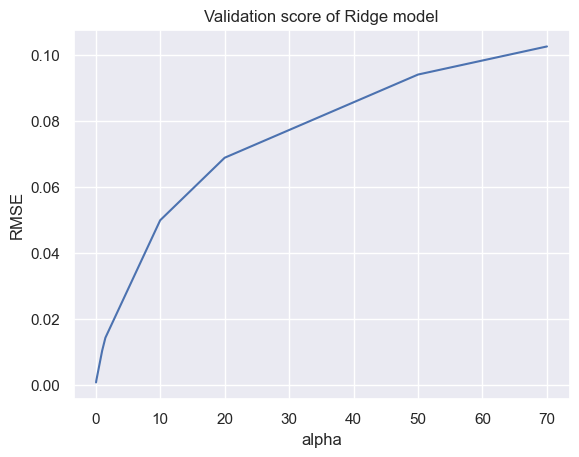

In [57]:
cv_ridge_series.plot(title = 'Validation score of Ridge model')
plt.ylabel('RMSE')
plt.xlabel('alpha')

In [58]:
cv_elasticnet = [rmse_cv(ElasticNet(alpha = alpha)).mean() for alpha in alphas]
cv_elasticnet_series = pd.Series(cv_elasticnet, index = alphas)
cv_elasticnet_series

0.05     0.142125
0.10     0.185937
1.00     0.264383
1.50     0.265989
10.00    0.304827
20.00    0.307463
50.00    0.325454
70.00    0.344935
dtype: float64

Text(0.5, 0, 'alphas')

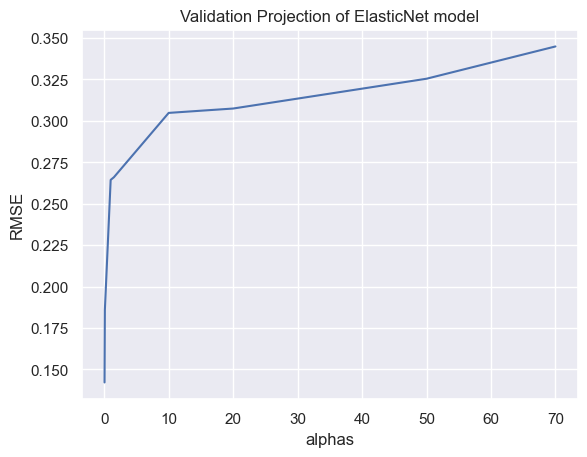

In [59]:
cv_elasticnet_series.plot(title = 'Validation Projection of ElasticNet model')
plt.ylabel('RMSE')
plt.xlabel('alphas')

In [60]:
cv_KRR = [rmse_cv(KernelRidge(alpha=alpha)).mean() for alpha in alphas]
cv_KRR_series = pd.Series(cv_KRR, index = alphas)
cv_KRR_series

0.05     0.000698
0.10     0.001355
1.00     0.010325
1.50     0.014228
10.00    0.049804
20.00    0.068749
50.00    0.094000
70.00    0.102537
dtype: float64

Text(0, 0.5, 'RMSE')

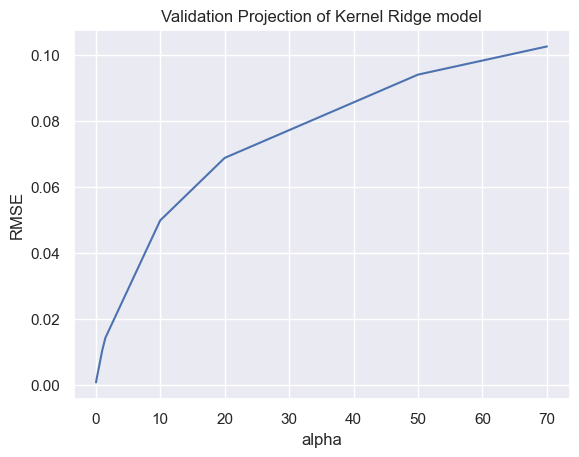

In [61]:
cv_KRR_series.plot(title = 'Validation Projection of Kernel Ridge model')
plt.xlabel('alpha')
plt.ylabel('RMSE')

Text(0, 0.5, 'RMSE')

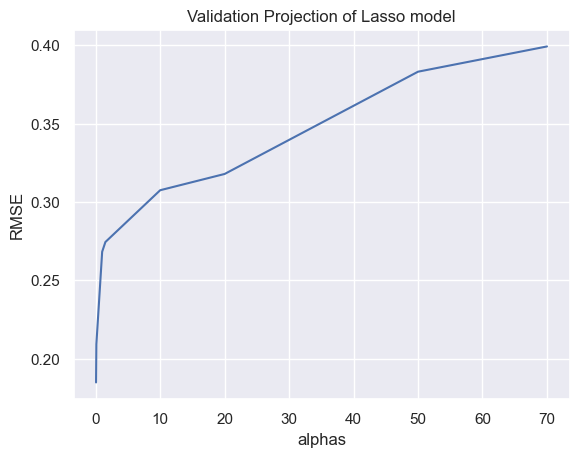

In [62]:
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]
cv_lasso_series = pd.Series(cv_lasso, index = alphas)
cv_lasso_series.plot(title = 'Validation Projection of Lasso model')
plt.xlabel('alphas')
plt.ylabel('RMSE')

In [63]:
cv_lasso_series.mean()

0.2930138915981593

In [64]:
cv_KRR_series.mean()

0.04271213227900381

In [65]:
cv_ridge_series.mean()

0.042756071563741664

In [66]:
cv_elasticnet_series.mean()

0.26763901988614314

In [67]:
model_lasso_fit = LassoCV(alphas=[5,1,0.5,0.05,0.001,0.0001]).fit(X_train, y_train)
rmse_cv(model_lasso_fit).mean()

0.00046349798012179297

In [68]:
lassocv_coef = pd.Series(model_lasso_fit.coef_, index = X_train.columns)
lassocv_coef[lassocv_coef != 0]

OverallQual     0.000252
YearBuilt       0.000006
YearRemodAdd    0.000008
BsmtFinSF1      0.000040
TotRmsAbvGrd    0.000131
Fireplaces      0.000001
GarageYrBlt    -0.000004
GarageArea      0.000001
OpenPorchSF     0.000007
SalePrice       0.997455
dtype: float64

In [69]:
print('Lasso pick '+str(sum(lassocv_coef != 0))+ ' variables and eliminated the orther ' + str(sum(lassocv_coef == 0))+ ' features')

Lasso pick 10 variables and eliminated the orther 258 features


In [70]:
prom_feats =  pd.concat([lassocv_coef.sort_values().head(5),
                        lassocv_coef.sort_values().tail(5)])

Text(0.5, 1.0, 'Coefficient in the Lasso model')

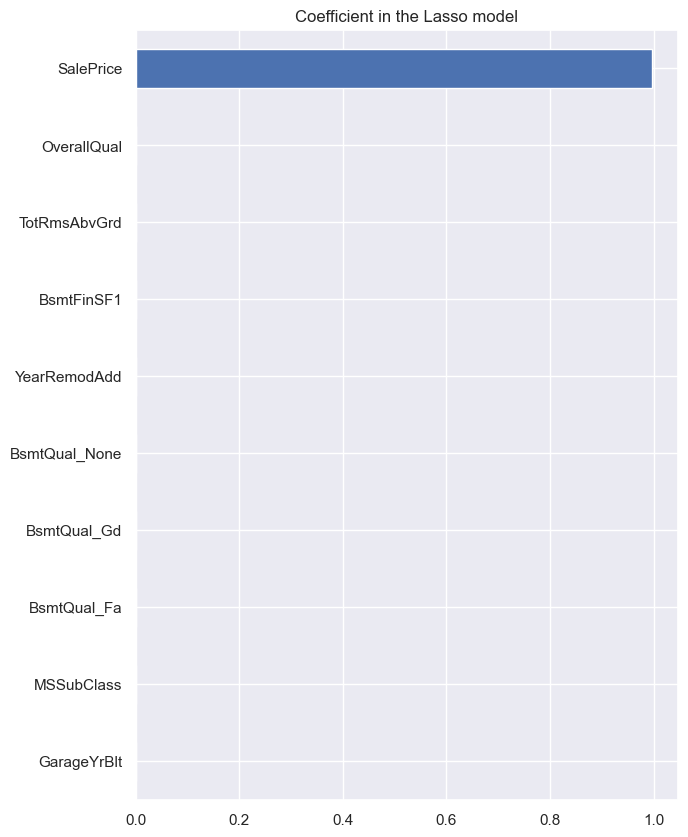

In [71]:
matplotlib.rcParams['figure.figsize'] = (7.0, 10.0)
prom_feats.plot(kind = 'barh')
plt.title('Coefficient in the Lasso model')

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 268 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(12), int64(13), uint8(243)
memory usage: 631.7 KB


In [76]:
#let's see feature importance by using PCA
from sklearn.decomposition import PCA
names = ['OverallQual','TotRmsAbvGrd','BsmtFinSF1','YearRemodAdd','BsmtQual_None','BsmtQual_Gd','BsmtQual_Fa','MsSubClass','GarageYrBlt']
pca = PCA(n_components = 10)
fit = pca.fit(X_train)

In [ ]:
print(fit.)

In [74]:
X_train.to_csv('housepred_2nd_traindata.csv')
y_train.to_csv('housepred_2nd_testdata.csv')